In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub 

In [2]:
from kagglehub import KaggleDatasetAdapter

In [3]:
# this thing imports datasets from kaggle as pandas dataframes
df = kagglehub.dataset_load(KaggleDatasetAdapter.PANDAS,
handle='zahidmughal2343/video-games-sale',
path='video games sales.csv'                             
)

In [4]:
df = df.drop('Rank', axis=1)

In [5]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [6]:
df.isna().any()
df[df['Year'].isna()]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
...,...,...,...,...,...,...,...,...,...,...
16307,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,0.00,0.00,0.00,0.01
16327,Inversion,PC,NaN,Shooter,Namco Bandai Games,0.01,0.00,0.00,0.00,0.01
16366,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,Unknown,0.01,0.00,0.00,0.00,0.01
16427,Virtua Quest,GC,NaN,Role-Playing,Unknown,0.01,0.00,0.00,0.00,0.01


In [7]:
columns = ['Name', 'Year', 'Platform', 'Global_Sales']

edited_df = df[columns]

In [8]:
edited_df = edited_df.dropna()

In [9]:
edited_df['Year'] = edited_df['Year'].astype(int)

In [17]:
edited_df

,Name,Year,Platform,Global_Sales
0,Wii Sports,2006,Wii,82.74
1,Super Mario Bros.,1985,NES,40.24
2,Mario Kart Wii,2008,Wii,35.82
3,Wii Sports Resort,2009,Wii,33.00
4,Pokemon Red/Pokemon Blue,1996,GB,31.37
...,...,...,...,...
16593,Woody Woodpecker in Crazy Castle 5,2002,GBA,0.01
16594,Men in Black II: Alien Escape,2003,GC,0.01
16595,SCORE International Baja 1000: The Official Game,2008,PS2,0.01
16596,Know How 2,2010,DS,0.01


In [18]:
sales_by_year = edited_df.groupby(['Year'], as_index=False).agg({'Global_Sales': 'sum'})

In [30]:
sales_by_year.head()

,Year,Global_Sales
0,1980,11.38
1,1981,35.77
2,1982,28.86
3,1983,16.79
4,1984,50.36


In [22]:
sales_by_year_platform = edited_df.groupby(['Year', 'Platform'], as_index=False).agg({'Global_Sales': 'sum'})

In [40]:
sales_by_year['Year'] = sales_by_year['Year'].astype(str)

Text(0.5, 1.0, 'Video games sales trend over the years')

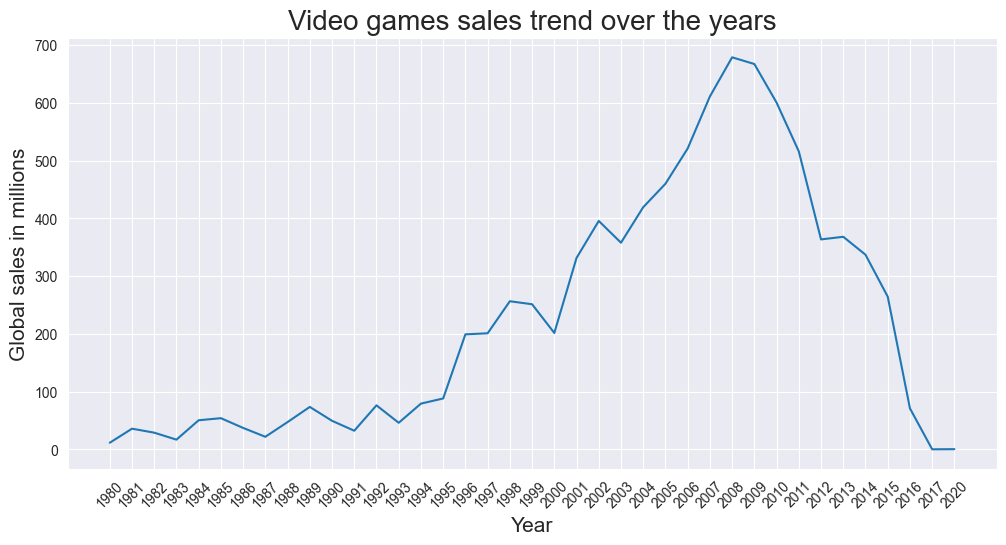

In [46]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
plt.tight_layout()
sns.lineplot(sales_by_year, x='Year', y='Global_Sales')

# here is some other customization options
plt.xlabel('Year', size = 15)
plt.ylabel('Global sales in millions', size = 15)
plt.title('Video games sales trend over the years', size=20)